# Dataset join, aggregation and pivot table

Contents this week:
 - Final project instruction I
 - Data Join
 - Web scrapping (If we have time)

Last week, we introduce `pd.concat` function to append different data vertically or horizontally. This week, we consider how to merge data based on some common columns.

In [1]:
import numpy as np
import pandas as pd

In [4]:
# DataFrame 1
df1 = pd.DataFrame({
    'ID': [2, 1, 3, 4],
    'Name': ['Bob', 'Alice', 'Charlie', 'David'],
    'Score': [90, 85, None, 88]
})

# DataFrame 2
df2 = pd.DataFrame({
    'ID': [1, 2, 3, 5],
    'Name': ['Alice', 'Bob', 'Charlie', 'Eve'],
    'Grade': ['A', 'B', None, 'C']
})

df1

ID     Name  Score
0   2      Bob   90.0
1   1    Alice   85.0
2   3  Charlie    NaN
3   4    David   88.0

In [5]:
df2

ID     Name Grade
0   1    Alice     A
1   2      Bob     B
2   3  Charlie  None
3   5      Eve     C

In [6]:
pd.concat([df1,df2])

ID     Name  Score Grade
0   2      Bob   90.0   NaN
1   1    Alice   85.0   NaN
2   3  Charlie    NaN   NaN
3   4    David   88.0   NaN
0   1    Alice    NaN     A
1   2      Bob    NaN     B
2   3  Charlie    NaN  None
3   5      Eve    NaN     C

In [17]:
pd.concat([df1,df2], axis = 1, join ='outer')

employee        group employee  hire_date
0      Bob   Accounting     Lisa       2004
1     Jake  Engineering      Bob       2008
2     Lisa  Engineering     Jake       2012
3      Sue           HR      Sue       2014

Data join:

`pd.concat()`: Stack or concatenate DataFrames along an axis, useful when you just need to append or combine them without needing a key.


`df.merge()` : SQL-style join based on key columns, useful when combining DataFrames with relational data.



In [16]:
# Merging based on the 'ID' column, performing an outer join
result = df1.merge(df2, on=['ID','Name'], how='outer')

# on = [keys]

result

KeyError: 'ID'

### `merge`

When using `pd.merge`, we look for one or more matching column names between the two inputs, and uses this as the key.

In [9]:
df1 = pd.DataFrame({'employee': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'group': ['Accounting', 'Engineering','Engineering', 'HR']})
df2 = pd.DataFrame({'employee': ['Lisa', 'Bob', 'Jake', 'Sue'], 'hire_date': [2004, 2008, 2012, 2014]})

In [10]:
df1

employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

In [11]:
df2

employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Jake       2012
3      Sue       2014

In [12]:
df3 = pd.merge(df1, df2)
df3

employee        group  hire_date
0      Bob   Accounting       2008
1     Jake  Engineering       2012
2     Lisa  Engineering       2004
3      Sue           HR       2014

In [14]:
df4 = pd.DataFrame({'group': ['Accounting', 'Engineering', 'HR'], 'supervisor': ['Carly', 'Guido', 'Steve']})
pd.merge(df3, df4)

employee        group  hire_date supervisor
0      Bob   Accounting       2008      Carly
1     Jake  Engineering       2012      Guido
2     Lisa  Engineering       2004      Guido
3      Sue           HR       2014      Steve

In [15]:
df5 = pd.DataFrame({'group': ['Accounting', 'Accounting','Engineering', 'Engineering', 'HR', 'HR'],
                    'skills': ['math', 'spreadsheets', 'software', 'math','spreadsheets', 'organization']})
df5

group        skills
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering      software
3  Engineering          math
4           HR  spreadsheets
5           HR  organization

In [18]:
df1

employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

In [19]:
pd.merge(df1, df5)

employee        group        skills
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering      software
3     Jake  Engineering          math
4     Lisa  Engineering      software
5     Lisa  Engineering          math
6      Sue           HR  spreadsheets
7      Sue           HR  organization

Specify key columns

In [38]:
df1

employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

In [39]:
df2

employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Mary       2012
3    Peter       2014

In [40]:
# when key column has the same column name
pd.merge(df1, df2, on="employee")

employee        group  hire_date
0      Bob   Accounting       2008
1     Lisa  Engineering       2004

In [41]:
# different column names
df1.columns = ["name", "group"]
df1

name        group
0   Bob   Accounting
1  Jake  Engineering
2  Lisa  Engineering
3   Sue           HR

In [42]:
pd.merge(df1, df2, left_on="name", right_on="employee")

name        group employee  hire_date
0   Bob   Accounting      Bob       2008
1  Lisa  Engineering     Lisa       2004

In [43]:
pd.merge(df1, df2, left_on="name", right_on="employee").drop("employee", axis=1)

name        group  hire_date
0   Bob   Accounting       2008
1  Lisa  Engineering       2004

In [44]:
df1.columns = ["employee", "group"]
df1a = df1.set_index("employee")
df1a

group
employee             
Bob        Accounting
Jake      Engineering
Lisa      Engineering
Sue                HR

In [45]:
df2a = df2.set_index("employee")
df2a

hire_date
employee           
Lisa           2004
Bob            2008
Mary           2012
Peter          2014

In [46]:
pd.merge(df1a, df2a, left_index=True, right_index=True)

group  hire_date
employee                        
Bob        Accounting       2008
Lisa      Engineering       2004

Different types of merge

In [29]:
df1

employee        group
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR

In [30]:
df2 = pd.DataFrame({"employee": ["Lisa", "Bob", "Mary", "Peter"], "hire_date":[2004, 2008, 2012, 2014]})
df2

employee  hire_date
0     Lisa       2004
1      Bob       2008
2     Mary       2012
3    Peter       2014

In [31]:
pd.merge(df1, df2)

employee        group  hire_date
0      Bob   Accounting       2008
1     Lisa  Engineering       2004

In [32]:
pd.merge(df1, df2, how="inner")

employee        group  hire_date
0      Bob   Accounting       2008
1     Lisa  Engineering       2004

Other options for the `how` keyword are `outer`, `left`, and `right`.
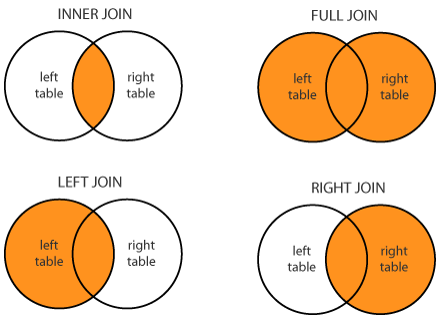

In [34]:
pd.merge(df1, df2, how="outer")

employee        group  hire_date
0      Bob   Accounting     2008.0
1     Jake  Engineering        NaN
2     Lisa  Engineering     2004.0
3      Sue           HR        NaN
4     Mary          NaN     2012.0
5    Peter          NaN     2014.0

In [35]:
pd.merge(df1, df2, how="left")

employee        group  hire_date
0      Bob   Accounting     2008.0
1     Jake  Engineering        NaN
2     Lisa  Engineering     2004.0
3      Sue           HR        NaN

In [36]:
pd.merge(df1, df2, how="right")

employee        group  hire_date
0     Lisa  Engineering       2004
1      Bob   Accounting       2008
2     Mary          NaN       2012
3    Peter          NaN       2014

## Aggregation

In [62]:
df = pd.read_csv("iris.csv")
df

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [63]:
df.mean(numeric_only = True)

sepal_length    5.843333
sepal_width     3.057333
petal_length    3.758000
petal_width     1.199333
dtype: float64

In [64]:
df.mean(axis=1, numeric_only = True)

0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64

### Groupby: split, apply, combine

- `split` breaks up and groups a DataFrame depending on the value of the specified key.
- `apply` computes some function, usually an aggregate, transformation, or filtering, within the individual groups.
- `combine` merges the results of these operations into an output array.

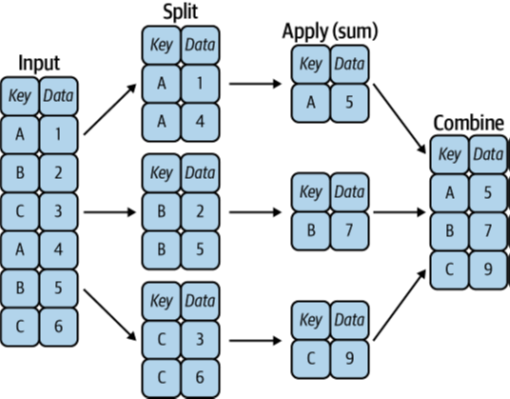

In [65]:
df.groupby("species").sum()

sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             250.3        171.4          73.1         12.3
versicolor         296.8        138.5         213.0         66.3
virginica          329.4        148.7         277.6        101.3

In [66]:
df.groupby("species")["petal_width"].mean(numeric_only = True)

species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64

In [67]:
df.groupby("species")["petal_width"].median()

species
setosa        0.2
versicolor    1.3
virginica     2.0
Name: petal_width, dtype: float64

In [68]:
df.groupby("species").aggregate(["min", "median", "max", 'count'])

sepal_length                   sepal_width                    \
                    min median  max count         min median  max count   
species                                                                   
setosa              4.3    5.0  5.8    50         2.3    3.4  4.4    50   
versicolor          4.9    5.9  7.0    50         2.0    2.8  3.4    50   
virginica           4.9    6.5  7.9    50         2.2    3.0  3.8    50   

           petal_length                   petal_width                    
                    min median  max count         min median  max count  
species                                                                  
setosa              1.0   1.50  1.9    50         0.1    0.2  0.6    50  
versicolor          3.0   4.35  5.1    50         1.0    1.3  1.8    50  
virginica           4.5   5.55  6.9    50         1.4    2.0  2.5    50

In [69]:
df.groupby('species').describe()

sepal_length                                              \
                  count   mean       std  min    25%  50%  75%  max   
species                                                               
setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

           sepal_width         ... petal_length      petal_width         \
                 count   mean  ...          75%  max       count   mean   
species                        ...                                        
setosa            50.0  3.428  ...        1.575  1.9        50.0  0.246   
versicolor        50.0  2.770  ...        4.600  5.1        50.0  1.326   
virginica         50.0  2.974  ...        5.875  6.9        50.0  2.026   

                                               
                 std  min  25%  50%  75%  max  
species                                        
setosa      0.105386  0.1  0.2  0.2  0.3  0.6  
versicolor  0.197753  1.0  1.2  1.3  1.5  1.8  
virginica   0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

In [70]:
df.groupby('species').aggregate({'sepal_length': ['min', 'max'],'sepal_width': 'mean'})

sepal_length      sepal_width
                    min  max        mean
species                                 
setosa              4.3  5.8       3.428
versicolor          4.9  7.0       2.770
virginica           4.9  7.9       2.974

In [73]:
df.groupby('species').filter(lambda x: x["sepal_length"].mean() > 6)

sepal_length  sepal_width  petal_length  petal_width    species
100           6.3          3.3           6.0          2.5  virginica
101           5.8          2.7           5.1          1.9  virginica
102           7.1          3.0           5.9          2.1  virginica
103           6.3          2.9           5.6          1.8  virginica
104           6.5          3.0           5.8          2.2  virginica
105           7.6          3.0           6.6          2.1  virginica
106           4.9          2.5           4.5          1.7  virginica
107           7.3          2.9           6.3          1.8  virginica
108           6.7          2.5           5.8          1.8  virginica
109           7.2          3.6           6.1          2.5  virginica
110           6.5          3.2           5.1          2.0  virginica
111           6.4          2.7           5.3          1.9  virginica
112           6.8          3.0           5.5          2.1  virginica
113           5.7          2.5           5.0          2.0  virginica
114           5.8          2.8           5.1          2.4  virginica
115           6.4          3.2           5.3          2.3  virginica
116           6.5          3.0           5.5          1.8  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica
119           6.0          2.2           5.0          1.5  virginica
120           6.9          3.2           5.7          2.3  virginica
121           5.6          2.8           4.9          2.0  virginica
122           7.7          2.8           6.7          2.0  virginica
123           6.3          2.7           4.9          1.8  virginica
124           6.7          3.3           5.7          2.1  virginica
125           7.2          3.2           6.0          1.8  virginica
126           6.2          2.8           4.8          1.8  virginica
127           6.1          3.0           4.9          1.8  virginica
128           6.4          2.8           5.6          2.1  virginica
129           7.2          3.0           5.8          1.6  virginica
130           7.4          2.8           6.1          1.9  virginica
131           7.9          3.8           6.4          2.0  virginica
132           6.4          2.8           5.6          2.2  virginica
133           6.3          2.8           5.1          1.5  virginica
134           6.1          2.6           5.6          1.4  virginica
135           7.7          3.0           6.1          2.3  virginica
136           6.3          3.4           5.6          2.4  virginica
137           6.4          3.1           5.5          1.8  virginica
138           6.0          3.0           4.8          1.8  virginica
139           6.9          3.1           5.4          2.1  virginica
140           6.7          3.1           5.6          2.4  virginica
141           6.9          3.1           5.1          2.3  virginica
142           5.8          2.7           5.1          1.9  virginica
143           6.8          3.2           5.9          2.3  virginica
144           6.7          3.3           5.7          2.5  virginica
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

In [74]:
df.groupby("species").transform("mean") # makes every value the mean

sepal_length  sepal_width  petal_length  petal_width
0           5.006        3.428         1.462        0.246
1           5.006        3.428         1.462        0.246
2           5.006        3.428         1.462        0.246
3           5.006        3.428         1.462        0.246
4           5.006        3.428         1.462        0.246
..            ...          ...           ...          ...
145         6.588        2.974         5.552        2.026
146         6.588        2.974         5.552        2.026
147         6.588        2.974         5.552        2.026
148         6.588        2.974         5.552        2.026
149         6.588        2.974         5.552        2.026

[150 rows x 4 columns]

In [75]:
df.groupby("species").transform(lambda x: x-x.mean())

sepal_length  sepal_width  petal_length  petal_width
0           0.094        0.072        -0.062       -0.046
1          -0.106       -0.428        -0.062       -0.046
2          -0.306       -0.228        -0.162       -0.046
3          -0.406       -0.328         0.038       -0.046
4          -0.006        0.172        -0.062       -0.046
..            ...          ...           ...          ...
145         0.112        0.026        -0.352        0.274
146        -0.288       -0.474        -0.552       -0.126
147        -0.088        0.026        -0.352       -0.026
148        -0.388        0.426        -0.152        0.274
149        -0.688        0.026        -0.452       -0.226

[150 rows x 4 columns]

In [76]:
df.groupby("species").apply(np.mean)

species
setosa        2.5355
versicolor    3.5730
virginica     4.2850
dtype: float64

In [79]:
df.groupby("species").apply(lambda x:x["sepal_length"]/x["sepal_length"].max())

species       
setosa     0      0.879310
           1      0.844828
           2      0.810345
           3      0.793103
           4      0.862069
                    ...   
virginica  145    0.848101
           146    0.797468
           147    0.822785
           148    0.784810
           149    0.746835
Name: sepal_length, Length: 150, dtype: float64

In [78]:
df.groupby("species")["sepal_length"].apply(lambda x: x/x.max())

species       
setosa     0      0.879310
           1      0.844828
           2      0.810345
           3      0.793103
           4      0.862069
                    ...   
virginica  145    0.848101
           146    0.797468
           147    0.822785
           148    0.784810
           149    0.746835
Name: sepal_length, Length: 150, dtype: float64

## Pivot table

In [80]:
df = pd.read_csv("titanic.csv")
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [81]:
df.groupby(['sex', 'pclass'])['survived'].aggregate('mean')

sex     pclass
female  1         0.968085
        2         0.921053
        3         0.500000
male    1         0.368852
        2         0.157407
        3         0.135447
Name: survived, dtype: float64

In [82]:
df.groupby(['sex', 'pclass'])['survived'].aggregate('mean').unstack()
# unstack <- giving multi index function, turns one of the indecies into columns

pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [83]:
df.pivot_table('survived', index='sex', columns='pclass', aggfunc='mean')

pclass         1         2         3
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

In [88]:
age = pd.cut(df['age'], [0, 18, 80], labels = ["young", "adult"])
df.pivot_table('survived', ['sex', age], 'pclass', observed=False)

pclass               1         2         3
sex    age                                
female young  0.909091  1.000000  0.511628
       adult  0.972973  0.900000  0.423729
male   young  0.800000  0.600000  0.215686
       adult  0.375000  0.071429  0.133663

In [89]:
fare = pd.qcut(df['fare'], 3) # qcut = intervals with same # of observations
df.pivot_table('survived', ['sex', age], [fare, 'pclass'])

fare         (-0.001, 8.662]           (8.662, 26.0]                      \
pclass                     1         3             1         2         3   
sex    age                                                                 
female young             NaN  0.700000           NaN  1.000000  0.583333   
       adult             NaN  0.523810           1.0  0.877551  0.433333   
male   young             NaN  0.166667           NaN  0.500000  0.500000   
       adult             0.0  0.127389           0.0  0.086957  0.102564   

fare         (26.0, 512.329]                 
pclass                     1    2         3  
sex    age                                   
female young        0.909091  1.0  0.111111  
       adult        0.972222  1.0  0.125000  
male   young        0.800000  0.8  0.052632  
       adult        0.400000  0.0  0.500000

In [91]:
df.pivot_table('survived', ['sex'], ['pclass'], margins=True)

pclass         1         2         3       All
sex                                           
female  0.968085  0.921053  0.500000  0.742038
male    0.368852  0.157407  0.135447  0.188908
All     0.629630  0.472826  0.242363  0.383838

# In-class activity: 

You are provided with three tables: a `Class Table`, an `Enrollment Table`, and a `Student Table`. 

Solve two subproblems: 
- 1) Calculate the **average class size** for each student, based on the courses they are enrolled in.
- 2) Calculate the **average GPA** of students for each instructor, considering that one instructor may teach multiple courses. 

In [49]:
# Class Table
class_df = pd.DataFrame({
    'Course_ID': ['STOR101', 'STOR102', 'STOR103', 'STOR104', 'STOR105'],
    'Instructor': ['Dr. Smith', 'Dr. Jones', 'Dr. Adams', 'Dr. Brown', 'Dr. Smith'],
    'Class_Size': [30, 25, 20, 15, 50]
})
class_df

Course_ID Instructor  Class_Size
0   STOR101  Dr. Smith          30
1   STOR102  Dr. Jones          25
2   STOR103  Dr. Adams          20
3   STOR104  Dr. Brown          15
4   STOR105  Dr. Smith          50

In [47]:
# Enrollment Table
enroll_df = pd.DataFrame({
    'Student_ID': [101, 102, 103, 101, 104, 105, 106, 102],
    'Course_ID': ['STOR101', 'STOR101', 'STOR102', 'STOR102', 'STOR103', 'STOR104', 'STOR105','STOR104'],
})
enroll_df

Student_ID Course_ID
0         101   STOR101
1         102   STOR101
2         103   STOR102
3         101   STOR102
4         104   STOR103
5         105   STOR104
6         106   STOR105
7         102   STOR104

In [48]:
# Student Table (with GPA)
student_gpa_df = pd.DataFrame({
    'Student_ID': [101, 102, 103, 104, 105, 106],
    'GPA': [3.5, 3.2, 3.8, 3.7, 3.0, 3.6]
})
student_gpa_df

Student_ID  GPA
0         101  3.5
1         102  3.2
2         103  3.8
3         104  3.7
4         105  3.0
5         106  3.6

In [50]:
# merge student_gpa_df and enroll_df
gpa_enroll_df = pd.merge(enroll_df, student_gpa_df, how="left")
gpa_enroll_df

Student_ID Course_ID  GPA
0         101   STOR101  3.5
1         102   STOR101  3.2
2         103   STOR102  3.8
3         101   STOR102  3.5
4         104   STOR103  3.7
5         105   STOR104  3.0
6         106   STOR105  3.6
7         102   STOR104  3.2

In [52]:
# connect course info to course ids
df = pd.merge(gpa_enroll_df, class_df, how="left")
df

Student_ID Course_ID  GPA Instructor  Class_Size
0         101   STOR101  3.5  Dr. Smith          30
1         102   STOR101  3.2  Dr. Smith          30
2         103   STOR102  3.8  Dr. Jones          25
3         101   STOR102  3.5  Dr. Jones          25
4         104   STOR103  3.7  Dr. Adams          20
5         105   STOR104  3.0  Dr. Brown          15
6         106   STOR105  3.6  Dr. Smith          50
7         102   STOR104  3.2  Dr. Brown          15

In [60]:
df.groupby("Student_ID").mean(numeric_only=True)

GPA  Class_Size
Student_ID                 
101         3.5        27.5
102         3.2        22.5
103         3.8        25.0
104         3.7        20.0
105         3.0        15.0
106         3.6        50.0

In [61]:
df.groupby("Instructor").mean(numeric_only=True)

Student_ID       GPA  Class_Size
Instructor                                  
Dr. Adams        104.0  3.700000   20.000000
Dr. Brown        103.5  3.100000   15.000000
Dr. Jones        102.0  3.650000   25.000000
Dr. Smith        103.0  3.433333   36.666667

# Calculate the range of iris data for each feature per species, display as pivot table

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("iris.csv")

sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]

In [13]:
colnames = df.columns[0:4]
df.pivot_table(values=colnames, index="species", aggfunc = lambda x: x.max() - x.min())

petal_length  petal_width  sepal_length  sepal_width
species                                                         
setosa               0.9          0.5           1.5          2.1
versicolor           2.1          0.8           2.1          1.4
virginica            2.4          1.1           3.0          1.6